# Notebook example

Installing some necessary packages:

In [1]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Failed to fetch package metadata for '@jupyter-widgets/jupyterlab-manager': URLError(ConnectionResetError(104, 'Connection reset by peer'))
Failed to fetch package metadata for '@jupyter-widgets/jupyterlab-manager': URLError(gaierror(-2, 'Name or service not known'))
An error occured.
ValueError: No version of @jupyter-widgets/jupyterlab-manager could be found that is compatible with the current version of JupyterLab.

Conflicting Dependencies:
JupyterLab                        Extension      Package
>=1.2.1 <1.3.0                    >=2.0.0 <3.0.0 @jupyterlab/application
>=1.2.2 <1.3.0                    >=2.0.0 <3.0.0 @jupyterlab/notebook
>=1.2.1 <1.3.0                    >=2.0.0 <3.0.0 @jupyterlab/rendermime
>=1.5.0 <1.6.0                    >=2.0.0 <3.0.0 @jupyterlab/rendermime-interfaces
>=4.2.0 <4.3.0                    >=5.0.0 <6.0.0 @jupyterlab/services
See the log file for details:  /tmp/jupyter

In [2]:
!pip install xgboost

**It is necessary to change the working directory so the project structure works properly:**

In [1]:
import sys
sys.path.append("../../")

From this point, it's on you!

---

In [30]:
import pandas as pd
import gc
from functools import reduce

from ml.data_source.spreadsheet import Spreadsheet
from ml.preprocessing.preprocessing import Preprocessing
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

In [41]:
#Ler dados da df e remover todos exceto o id
df = Spreadsheet().get_data('../../../data/raw/estaticos_market.csv')
df.drop(df.columns.difference(['id']), 1, inplace=True)

In [4]:
#Leitura dos Components principais
import pickle
with open('../../../output/principal_components.pickle', 'rb') as f:
    principal_components = pickle.load(f)

In [15]:
#Processar o KMeans
gc.collect()
kmeans = MiniBatchKMeans(n_clusters=2000, random_state=174, batch_size=100000).fit(principal_components)
gc.collect()

0

(array([256., 393., 787., ...,  41., 158., 316.]),
 array([0.0000000e+00, 9.9950000e-01, 1.9990000e+00, ..., 1.9970010e+03,
        1.9980005e+03, 1.9990000e+03]),
 <a list of 2000 Patch objects>)

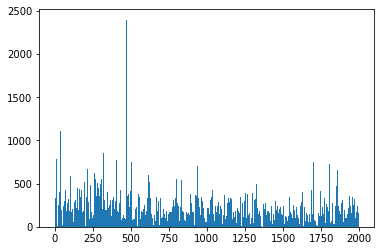

In [17]:
plt.hist(kmeans.labels_, bins = 2000)

In [56]:
#Salvamento dos cálculos
df['kmeans'] = kmeans.labels_

with open('../../../output/kmeans.pickle', 'wb') as f:
    pickle.dump(kmeans, f)
    
with open('../../../output_web/id_cluster.pickle', 'wb') as f:
    pickle.dump(df, f)